# Анализ бизнес-показателей  Procrastinate Pro+

Компания по разработке приложения Procrastinate Pro+ делает весомые вложения в рекламу, но последние несколько месяцев расходы превышают доходы. Необходимо найти причину произошедшего события и дать рекомендации для отдела маркетинга, чтобы работа компании вышла в положительный баланс. Исходные данные:файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, файл orders_info_short.csv — информацию о заказах,   
файл costs_info_short.csv — информацию о расходах на рекламу.

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
    
Содержание проекта

<a href='#Selection1'> 1 Предобработка данных </a>
    
- <a href='#Selection1.1'>1.1 Изучение файлов с данными, получение общей информации, загрузка библиотек</a>
    
- <a href='#Selection1.2'>1.2 Замена названия столбцов в таблице  </a> 
    
- <a href='#Selection1.3'>1.3 Поиск дубликатов </a>
    
- <a href='#Selection1.4'>1.4 Изучение и замена типов данных в столбцах </a>
    
<a href='#Selection2'> 2 Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии </a>  

<a href='#Selection3'> 3 Исследовательский анализ данных </a>
- <a href='#Selection3.1'> 3.1 Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей </a>
- <a href='#Selection3.2'> 3.2 Определение страны с большим числом платящих пользователей </a>
- <a href='#Selection3.3'> 3.3 Определение вида устройства платящих пользователей </a>
- <a href='#Selection3.4'> 3.4 Анализ рекламных источников привлечения </a>
    
<a href='#Selection4'> 4 Маркетинг </a> 
- <a href='#Selection4.1'> 4.1 Определение общей суммы расходов на маркетинг </a>
- <a href='#Selection4.2'> 4.2 Анализ  суммы расходов по каждому источнику </a>
- <a href='#Selection4.3'> 4.3 Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику </a>    
- <a href='#Selection4.4'> 4.4 Подсчет cтоимости привлечения одного покупателя из каждого источника в среднем (CAC) </a> 
    
<a href='#Selection4'> 5 Оценка окупаемости рекламы </a>
- <a href='#Selection5.1'> 5.1 Анализ окупаемости рекламы c помощью графиков LTV и ROI, графиков динамики LTV, CAC и ROI </a> 
- <a href='#Selection5.2'> 5.2 Подсчет конверсии пользователей (CR) и удержания. Изучение динамики их изменения </a>     
- <a href='#Selection5.3'> 5.3 Анализ окупаемость рекламы с разбивкой по устройствам </a> 
- <a href='#Selection5.4'> 5.4 Анализ окупаемость рекламы с разбивкой по странам </a>
- <a href='#Selection5.5'> 5.5 Анализ окупаемость рекламы с разбивкой по каналам </a>
    
<a href='#Selection6'> 6 Итоговые выводы </a>    

<a id='Selection1'></a> 

## Предобработка данных

<a id='Selection1.1'></a>

### Изучение файлов с данными, получение общей информации, загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
sessions = pd.read_csv('/datasets/visits_info_short.csv') 

orders = pd.read_csv('/datasets/orders_info_short.csv') 

costs = pd.read_csv('/datasets/costs_info_short.csv') 

In [3]:
sessions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [6]:
sessions.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


*Структура visits_info_short.csv:*

User Id — уникальный идентификатор пользователя,

Region — страна пользователя,

Device — тип устройства пользователя,

Channel — идентификатор источника перехода,

Session Start — дата и время начала сессии,

Session End — дата и время окончания сессии.

In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


*Структура orders_info_short.csv:*

User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.

In [8]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


*Структура costs_info_short.csv:*

dt — дата проведения рекламной кампании,

Channel — идентификатор рекламного источника,

costs — расходы на эту кампанию.

**Вывод:** 

Полученные данные требуют предобработки пред проведением дальнейшего анализа. Пропущенных значний не обраружено. Необходимо провести проверку на наличие дубликатов. Исправить название столбцов в таблицах (привести к нижнему регистру и использоваться нижнее подчеркивание). По типам данных - неободимо разменить типы данных в столбцах с датой и временем на соответствующий формат.

<a id='Selection1.2'></a>

### Замена названия столбцов в таблице

In [9]:
sessions.columns = [x.lower().replace(' ', '_') for x in sessions.columns.values]

In [10]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]

In [11]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

<a id='Selection1.3'></a>

### Поиск дубликатов 

In [12]:
sessions.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
costs.duplicated().sum()

0

In [15]:
sessions['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [16]:
sessions['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [17]:
sessions['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [18]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

<a id='Selection1.4'></a>

### Изучение и замена типов данных в столбцах

In [19]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])

In [20]:
sessions['session_end'] = pd.to_datetime(sessions['session_end'])

In [21]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [22]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Вывод по разделу:** 
Были изучены полученные данные о посещениях сайта, заказах, расходах на рекламу. Исходные данные требовали предобработки пред проведением дальнейшего анализа. Провели проверку на наличие явных и неявных дубликатов и наличиее пропущенных значений. Дубликатов и пропусков в данных не было обнаружено. Обраружены ошибки в наименовании столбцов и внесены изменния. Была произведена замена названия столбцов путем приведения к нижнему регистру.  Произвели замену типов данных в столбцах session_start, session_end и event_dt, исходя из названия столбца и его содержания. 

<a id='Selection2'></a>

## Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [23]:
# функция создания профилей
def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [27]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [28]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [30]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(2, 1, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(2, 1, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='Selection3'></a>

## Исследовательский анализ данных


<a id='Selection3.1'></a>

### Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу компании

In [31]:
# получаем профили пользователей

profiles = get_profiles(sessions, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [32]:
# минимальная дата привлечения пользователей

min_date = profiles['dt'].min()
min_date

datetime.date(2019, 5, 1)

In [33]:
# максимально возможная дата привлечения с учётом горизонта

max_date = profiles['dt'].max()
max_date

datetime.date(2019, 10, 27)

In [34]:
# задаём момент и горизонт анализа данных

observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

Комментарий:По условию задачи данные анализируются с 1 ноября 2019 года. Окупаемость должна наступить не позднее, чем через 2 недели после привлечения пользователей. Таким образом, момент анализа составляет 1 ноября 2019 г., горизонт анализа - 14 дней.

Минимальная дата привлечения пользователей - 1 мая 2019 г. Максимальная дата привлечения пользователей с учетом горизонта - 19 октября 2019 г.

<a id='Selection3.2'></a>

### Определение страны с большим числом платящих пользователей

In [35]:
# группипуем данные по странам и платящим пользователям

region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})

region.columns = ['user_count', 'payer_sum', 'share']

region.sort_values(by=['user_count'], ascending=False).style.format({'share': '{:.1%}'})


,user_count,payer_sum,share
region,,,
United States,100002,6902,6.9%
UK,17575,700,4.0%
France,17450,663,3.8%
Germany,14981,616,4.1%


Комментарий: Данное приложение используют жители 4 стран: США, Великобритания, Франция и Германия. США значительно лидируют по количеству пользователей приложения Procrastinate Pro - больше  100 тыс пользователей, далее пользователи из Великобритании, Франции, а в Германии приложение менее популярно, чем в других странах - менее 15 тыс пользователей. Доля платящих пользователей выше в США - 6.9%, далее на втором месте идет Германия - 4.1%, Великобритания и Франция разделили третье и червертое место с незначительной разницей - 4.0% и 3.8% соответственно. 

<a id='Selection3.3'></a>

### Определение вида устройства платящих пользователей

In [36]:
# группипуем данные по устройствам и платящим пользователям

device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})

device.columns = ['user_count', 'payer_sum', 'share']

device.sort_values(by=['user_count'], ascending=False).style.format({'share': '{:.1%}'})



,user_count,payer_sum,share
device,,,
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%
Mac,30042,1912,6.4%


Комментарий: Позьзователи заходят в приложение с 4-х устройств: iPhone, Android, Mac и PC.  iPhone является самым популярным устройством среди всех пользователей, далее Android, PC и Mac. При делении всех пользователей на платящих и неплатящих, iPhone остается самым популярным, далее  Android, Mac и PC. 
Доля платящих пользователей для iPhone - 6.2%, для Android - 5.9%,  для Mac - 6.4%, для PC - 5%. Больше всего доля платящих пользователей с устройствами Mac.

<a id='Selection3.4'></a>

### Анализ рекламных источников привлечения

In [37]:
# группипуем данные по каналам привлечения и платящим пользователям

channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})

channel.columns = ['user_count', 'payer_sum', 'share']

channel.sort_values(by=['user_count'], ascending=False).style.format({'share': '{:.1%}'})


,user_count,payer_sum,share
channel,,,
organic,56439,1160,2.1%
FaceBoom,29144,3557,12.2%
TipTop,19561,1878,9.6%
OppleCreativeMedia,8605,233,2.7%
LeapBob,8553,262,3.1%
WahooNetBanner,8553,453,5.3%
RocketSuperAds,4448,352,7.9%
MediaTornado,4364,156,3.6%
YRabbit,4312,165,3.8%


Комментарий: Количество рекламных источников привлечения - 10. Больше всего пользователей "organic", то есть тех, кто пришли без каких-либо рекламных источников - 56,44 тыс. Далее популярными рекламные источниками,которые в значительной степени опережают остальные источники - FaceBoom (29,14 тыс) и TipTop (19,56 тыс).

Доля платящих пользователей распределена следующим образом:

FaceBoom - 12.2%

AdNonSense - 11.3%

TipTop -9.6%

lambdaMediaAds - по 10.5%.


По таблице источнки  AdNonSense и lambdaMediaAds по количеству привлеченных пользователей занимают последнее место, а в доле платящих 2 и 4 место. Это говорит о том, что реклама здесь работает качественнее.
Наименьшая доля платящих пользователей у тех, кто пришел без рекламных источников - всего 2.7%.

**Вывод**:
В исследовательском разделе:

- составили профили пользователей. Определите минимальную (1 мая 2019 г) и максимальную (27 октября 2019 г) даты привлечения пользователей. По условию задачи данные анализируются с 1 ноября 2019 года. Окупаемость должна наступить не позднее, чем через 2 недели после привлечения пользователей. Таким образом, момент анализа составляет 1 ноября 2019 г., горизонт анализа - 14 дней.
- выяснили,что данное приложение используют жители 4 стран: США, Великобритания, Франция и Германия. США значительно лидируют по количеству пользователей.
- выяснили, что позьзователи заходят в приложение с 4-х устройств: iPhone, Android, Mac и PC. iPhone является самым популярным устройством среди всех пользователей, далее Android, PC и Mac. При делении всех пользователей на платящих и неплатящих, iPhone остается самым популярным, далее Android, Mac и PC. Доля платящих пользователей для iPhone - 6.2%, для Android - 5.9%, для Mac - 6.4%, для PC - 5%.Больше всего доля платящих пользователей с устройствами Mac. 

- изучили рекламные источники привлечения и определи, что количество рекламных источников привлечения - 10. Больше всего пользователей "organic", то есть тех, кто пришли без каких-либо рекламных источников. Самыми популярными рекламные источниками,которые в значительной степени опережают остальные источники - FaceBoom  и TipTop. При этом источнки AdNonSense и lambdaMediaAds по количеству привлеченных пользователей занимают последнее место, а в доле платящих 2 и 4 место. Это говорит о том, что реклама здесь работает качественнее. 

<a id='Selection4'></a>

## Маркетинг

<a id='Selection4.1'></a>

###  Определение общей суммы расходов на маркетинг

In [38]:
# ищем общую сумму затраченных средств на рекламу 

costs_sum = costs['costs'].sum()
costs_sum

105497.30000000002

Комментрарий: Общая сумма затраченных средств на рекламу для продвижения приложения Procrastinate Pro+ - 105497 тыс

<a id='Selection4.2'></a>

### Анализ  суммы расходов по каждому источнику

In [39]:
# группипуем данные по рекламным источникам и количеству расходов

costs_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by=['costs'], ascending=False)

costs_channel['share'] = costs_channel['costs']/costs_sum

costs_channel.style.format({'share': '{:.1%}'})

,costs,share
channel,,
TipTop,54751.300000,51.9%
FaceBoom,32445.600000,30.8%
WahooNetBanner,5151.000000,4.9%
AdNonSense,3911.250000,3.7%
OppleCreativeMedia,2151.250000,2.0%
RocketSuperAds,1833.000000,1.7%
LeapBob,1797.600000,1.7%
lambdaMediaAds,1557.600000,1.5%
MediaTornado,954.480000,0.9%


Комментарий: По полученным результатам больше всего средств тратится на продвижение в TipTop - 57751 тыс(51.9% от общего количества расходов), далее FaceBoom - 32445 тыс(30.8% от общего количества расходов). Данные позиции в значительной степени отличаются от других рекламных источников по количеству расходов.

<a id='Selection4.3'></a>

### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [40]:
# создание новых столбцов и преобразование типа данных

costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month

In [41]:
# группируем данные по количеству затраченных средств ежемесячно

costs.groupby('month').agg({'costs': 'sum'})


,costs
month,
5,9978.570
6,15090.045
7,16447.060
8,20657.870
9,22441.340
10,20882.415


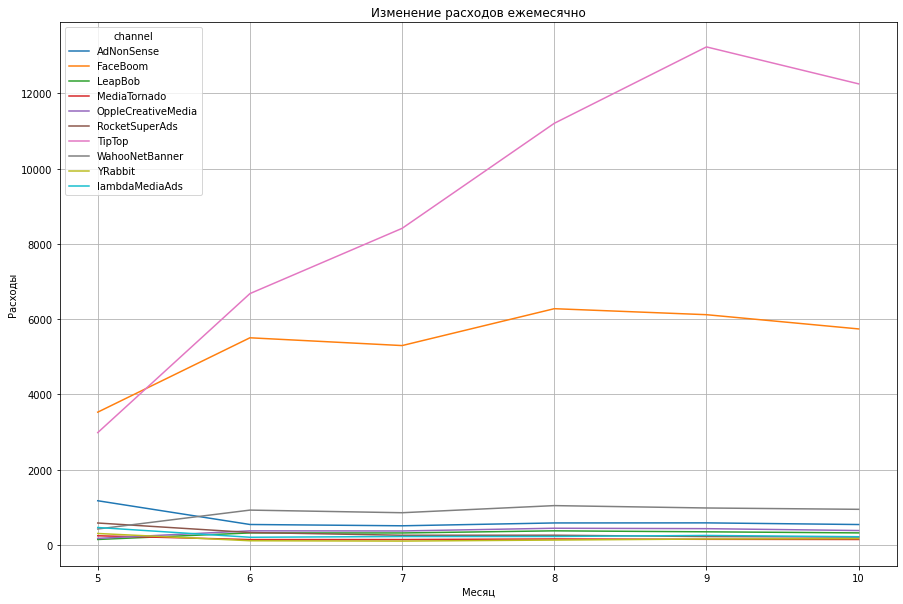

In [42]:
# визуализация изменений расходов по месяцам

costs.pivot_table(
    index='month', 
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение расходов ежемесячно')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

На данном графике четко выделяются 2 рекламных источника  'FaceBoom' и 'TipTop'. Здесь видно, что на рекламу через канал 'TipTop' расходы увеличиваются каждый месяц в значительном размере, по сравнению с остальными источниками. На втором месте канал 'FaceBoom', который тоже значительно отличается, но динамика расходов практически стабильная с сокращением затрат к концу периода. 

In [43]:
# создание новых столбцов и преобразование типа данных

costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week

In [44]:
# группируем данные по количеству затраченных средств еженедельно

costs.groupby('week').agg({'costs': 'sum'})

,costs
week,
18,1455.640
19,2031.820
20,1976.320
21,2297.120
22,3427.075
23,2915.740
24,2706.390
25,3421.390
26,4837.120


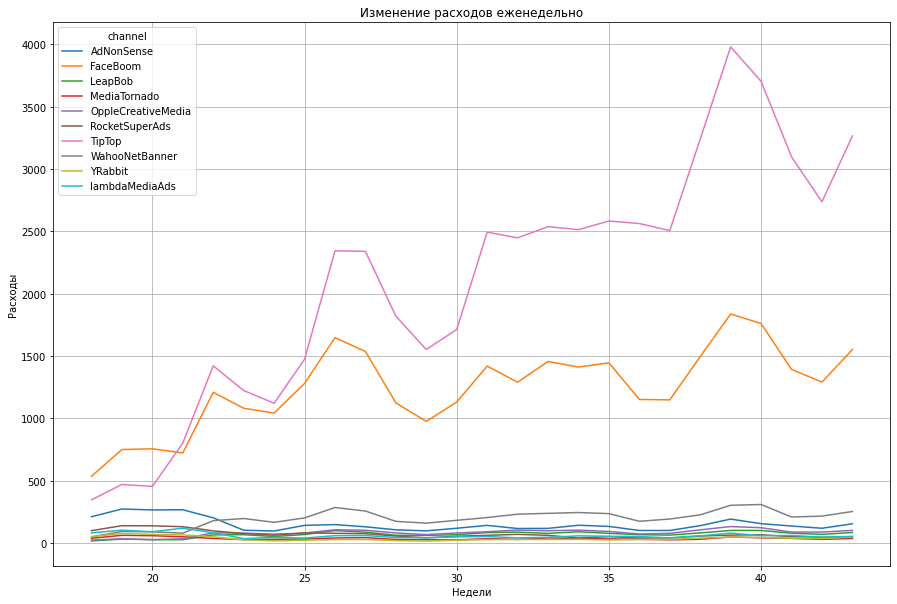

In [45]:
# визуализация изменений расходов по неделям

costs.pivot_table(
    index='week', 
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение расходов еженедельно')
plt.xlabel('Недели')
plt.ylabel('Расходы')
plt.show()

Комментарий: На данном графике также  выделяются 2 рекламных источника  'FaceBoom' и 'TipTop'. Здесь видно, что на рекламу через канал 'TipTop' расходы увеличиваются каждый месяц в значительном размере, по сравнению с остальными источниками. Однако спада по каналу 'FaceBoom'не наблюдается. Чтобы посмотреть динамику расходов других источников, сдедаем визуализацию без  'FaceBoom' и 'TipTop'. 

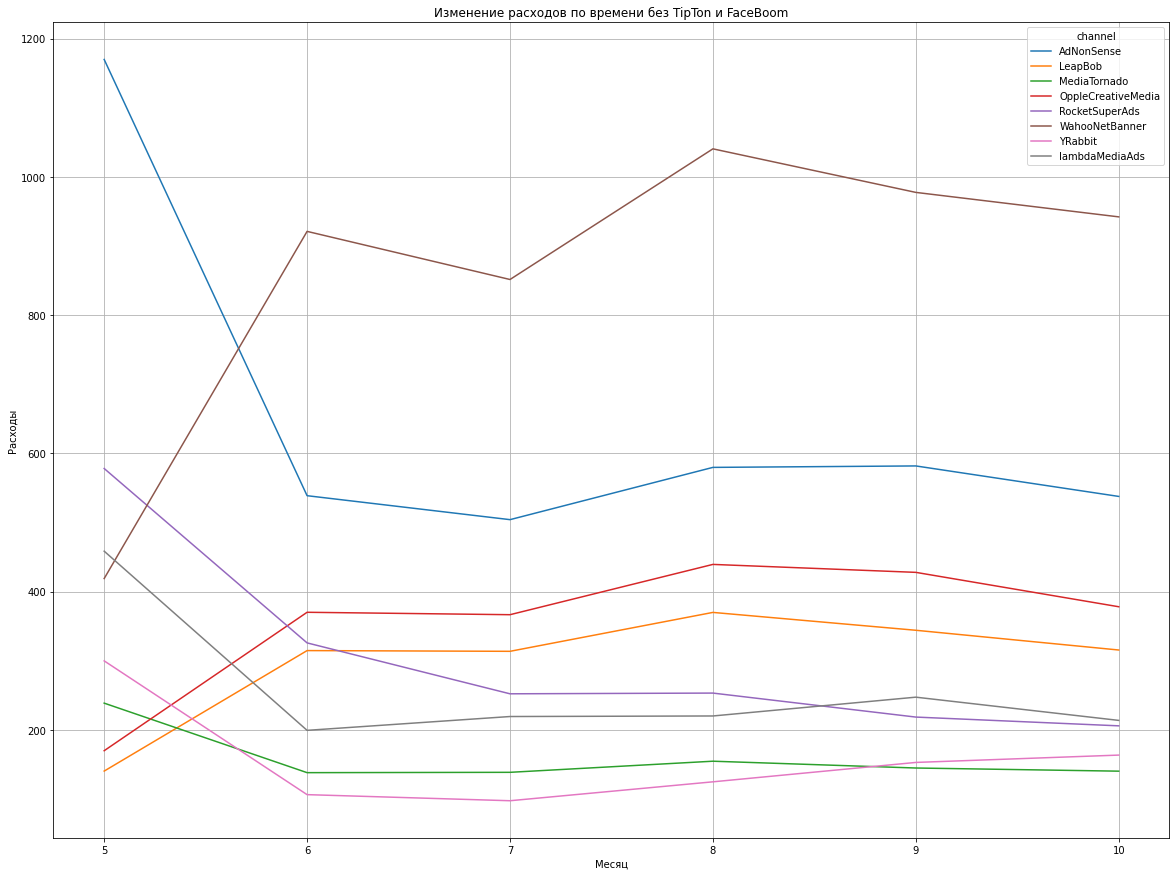

In [46]:
# визуализация изменений расходов ежемесячно без TipTon и FaceBoom

costs2 = costs[(costs.channel != 'FaceBoom') & (costs.channel != 'TipTop')]
costs2.pivot_table(
    index='month',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(20, 15), grid=True)

plt.title('Изменение расходов по времени без TipTon и FaceBoom')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

Комментарий: По полученным данным можно сделать вывод, что каждый месяц с мая по октябрь расходы на рекламу росли росли стабильно только у каналов WahooNetBanner(в значительной степени), OppleCreativeMedia и LeapBob. При этом по всем трем каналам отмечается спад расходов в период с сентября по октябрь. По остальным каналам продвижения идет заметный спад расходов на рекламу. 

<a id='Selection4.4'></a>

### Подсчет cтоимости привлечения одного покупателя из каждого источника в среднем (CAC)

In [47]:
# находим LTV с разбивкой по каналам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)


In [48]:
# средний CAC по каналам привлечения

cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
).sort_values(by = 'cac', ascending=False)

round(cac, 2)

,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


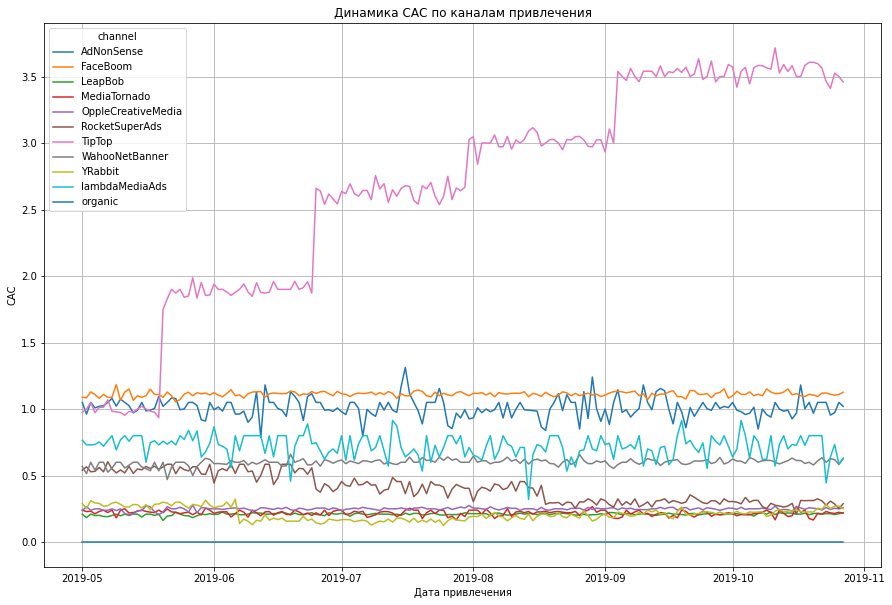

In [49]:
# визуализация CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [50]:
# средний CAC по всему проекту
cac_total = (profiles.query('channel != "organic"').agg({'acquisition_cost': 'mean'}))
round(cac_total, 2)

acquisition_cost    1.13
dtype: float64

Комментарий: По попучившимся результам можно сделать вывод, что из канал TipTop получаются самые дорогие пользователи - в среднем в 2.8, из FaceBoom - 1.11 , из AdNonSense - 1.01. По графику можем сделать выводы, что по большинству каналов расходы на протяжении всего времени были примерно равномерными, то канал TipTop на их фоне значительно выделяется, т.к. расходы на одного пользователя росли почти каждый месяц. Также стоит отметить, что отличающие колебания иеет канал lambdaMediaAds, а расходы на рекламу на канале RocketSuperAds значительно снижались в сравнении с остальными.Средний CAC по всем каналам привлечения составил 0,7.

**Вывод:**
В маркетинговом разделе посчитали общую сумму расходов на маркетинг, которая составила 105497 тыс.
Выяснили, что траты распределены по рекламным источникам следующим образом:
	
- TipTop 51.9%
- FaceBoom	30.8%
- WahooNetBanner	4.9%
- AdNonSense	3.7%
- OppleCreativeMedia		2.0%
- RocketSuperAds	1.7%
- LeapBob		1.7%
- lambdaMediaAds	1.5%
- MediaTornado 0.9%
- YRabbit	0.9%

По полученным результатам больше всего средств тратится на продвижение в TipTop, далее FaceBoom - 32445 тыс. Данные позиции в значительной степени отличаются от других рекламных источников по количеству расходов.

Посчитали, что в среднем стоило привлечение одного пользователя (CAC) по всем каналам привлечения составил 0,7. А при разбивке по каналам:
- через канал TipTop получаются самые дорогие пользователи в среднем в 2.8
- из FaceBoom - 1.11 
- из AdNonSense - 1.01

<a id='Selection5'></a>

## Оценка окупаемости рекламы

<a id='Selection5.1'></a>

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, графиков динамики LTV, CAC и ROI

Перед исследованием оценки окупаемости рекламы исключаем органических пользователей, чтобы результаты попучились корректными.

In [51]:
# исключение органических пользователей из таблицы

profiles = profiles.query('channel != "organic"')

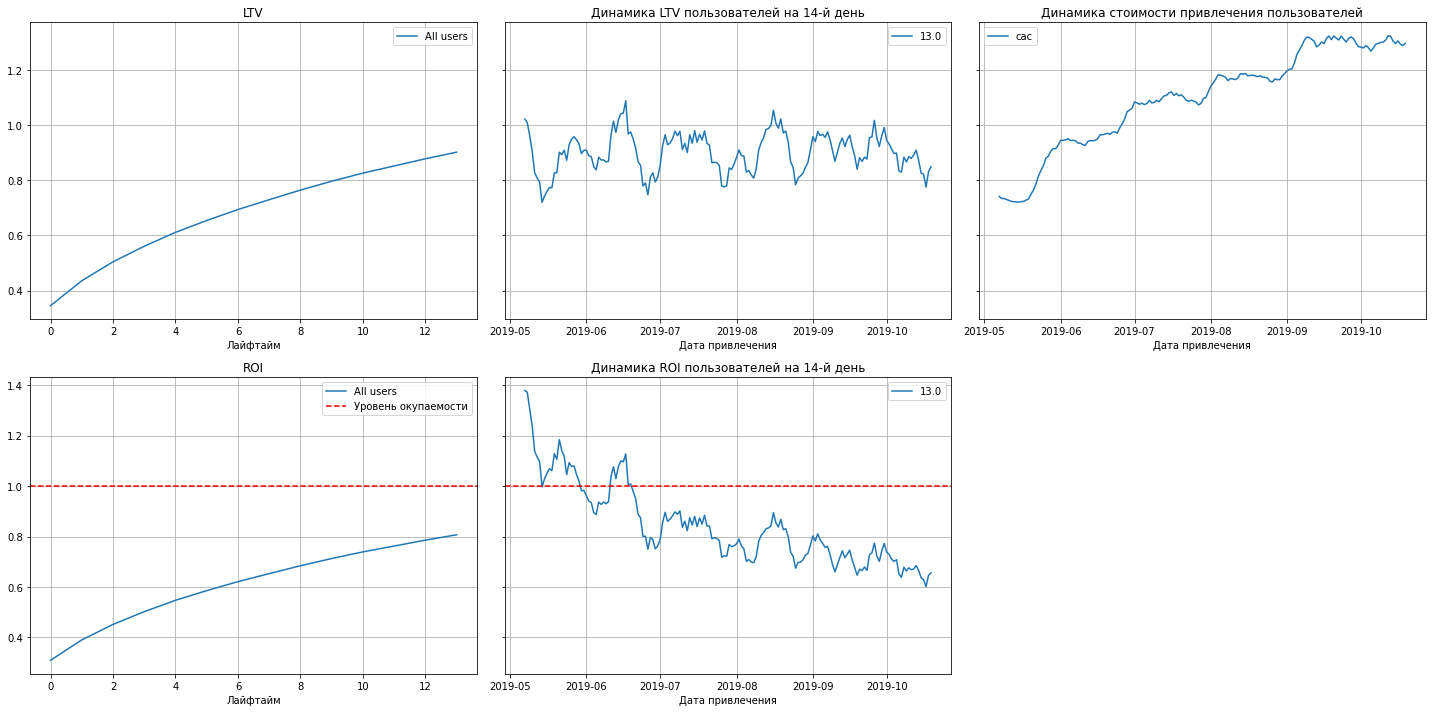

In [52]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Комментарий: Из графиков можно сделать вывод, что: 

- LTV достаточно стабильно растет.

- динамика LTV достаточно стабилена. Значит, дело не в ухудшении качества пользователей.

- CAC не стабилен. Динамика стоимости привлечения пользователей значительно увеличивалась. 

- реклама не окупается, ROI в конце 2 -х недель — чуть выше 80%, что ниже уровня окупаемости.

- Динамика ROI пользователей на 14-й день падает все больше со временем.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Комментарий ревьюера, ревью 1</b> 
    
Да, верно, ROI находится ниже уровня окупаемости. Причем опустился он туда примерно в то же время, когда начали расти расходы на привлечение. Так что, возможно, это связано. LTV пользователей стабильный, верно.

<a id='Selection5.2'></a>

### Подсчет конверсии пользователей (CR) и удержания. Изучение динамики их изменения

Рассмотрим для начала общую конверсию и удержание, а далее с разбивками по рекламным каналам, по устройствам и регионам привлечения. 

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

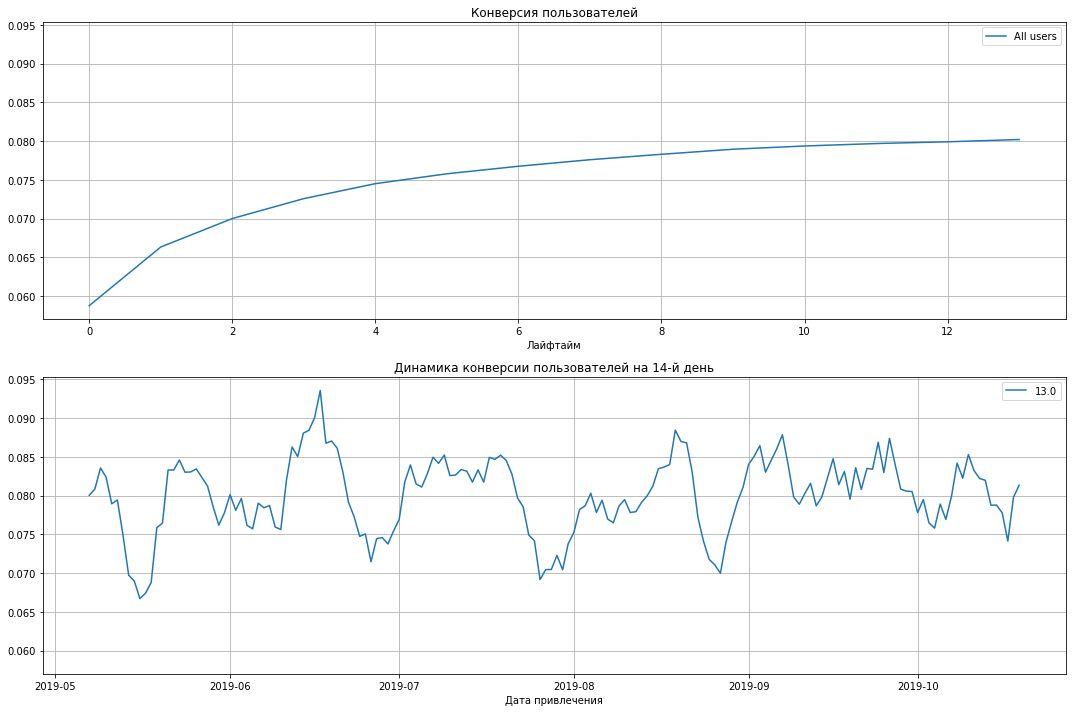

In [53]:
# смотрим общую конверсию и ее динамику 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Комментарий: По данным графикам видно, что общая конверсия растёт растет в течении 14 дней. Рост более выражен вначале пути до 10 дня и более стабилен с 10 до 14 дня. Общая динамика конверсии идет с резкими падениями и менее выраженными подъемами. Наиболее стабильная динамика в период с сентября 2019. 

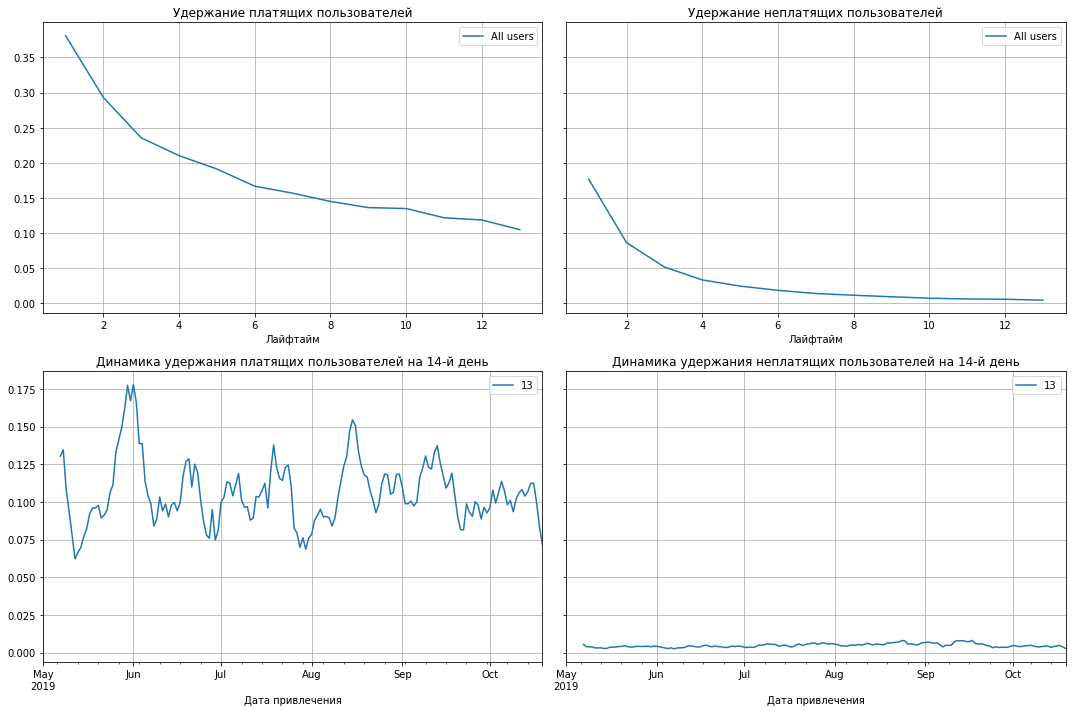

In [54]:
# смотрим общее удержание пользователей и динамику

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

Комментарий: По получившимся графикам можно сделать вывод, что удержание платящих пользоватей выше чем удержание неплатящих. . Удержание платящих пользователей на графике идет со значительными колебаниями. Удержание неплатящих пользователей на графике стабильно. Чтобы разобраться в причинах убытков компании, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

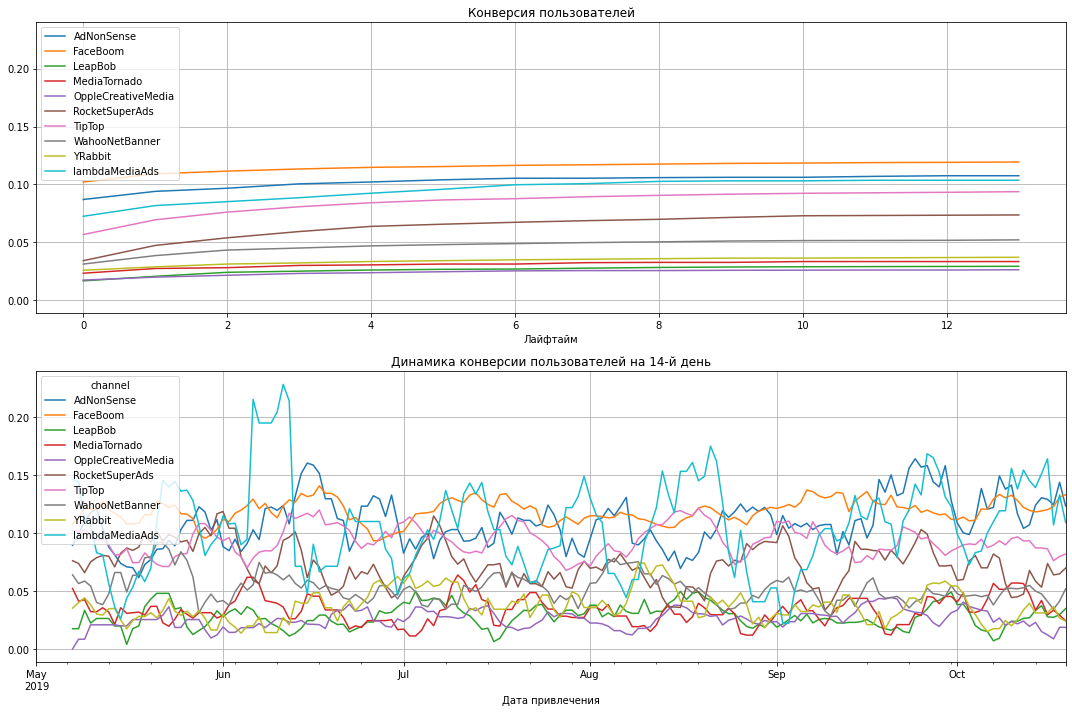

In [55]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Комментарий: По полученым графикам видно, что в целом конверсия пользователей из всех рекламных каналов постепенно растёт на протяжении всех 14 дней. Выше всего конверсия у посетителей через канал FaceBoom. В динамике 14 дней конверсия в целом стабильна, выделяется канал lambdaMediaAds.

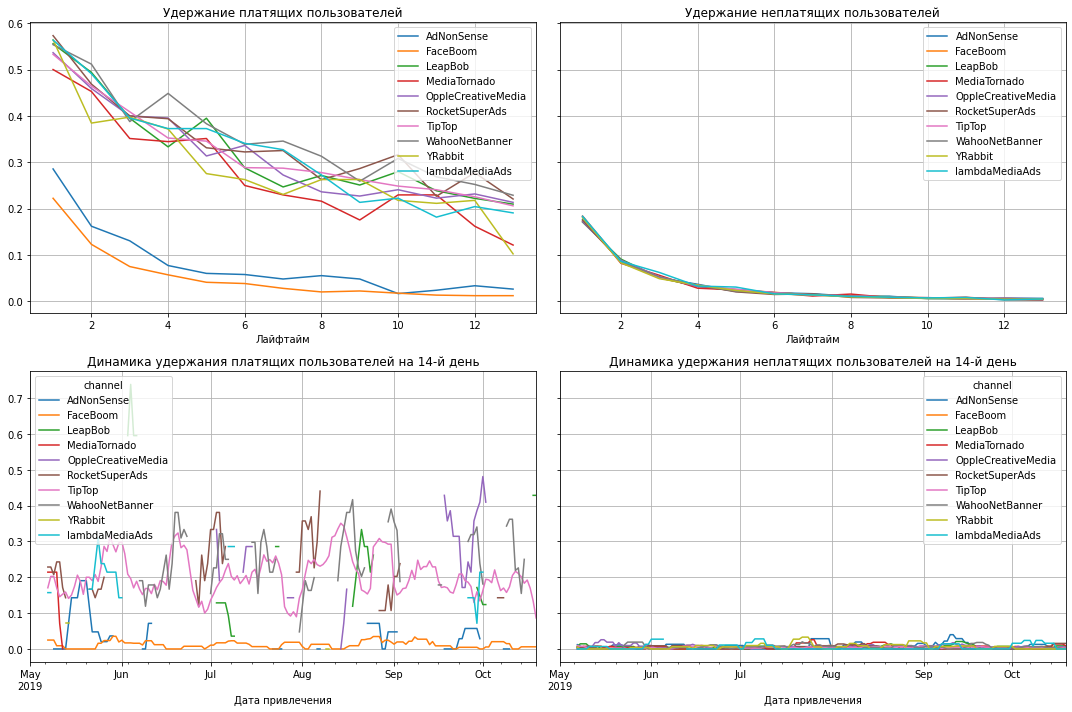

In [56]:
# смотрим удержание с разбивкой по каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Комментарий: С разбивкой по каналам хуже всех удерживаются пользователи из FaceBoom, при этом опережая остальных по конверсии. Это значит, что через канал FaceBoom приходят в приложение большое количество пользователей, далее некоторые переходят в статус "платящих" и не задерживаются в приложении надолго. Также одним из худших по удержанию оказался рекламный источник AdNonSense. Однако в динамике удержания наиболее стабильлен  канал FaceBoom. Удержание неплатящих пользователей стабильно низкое.

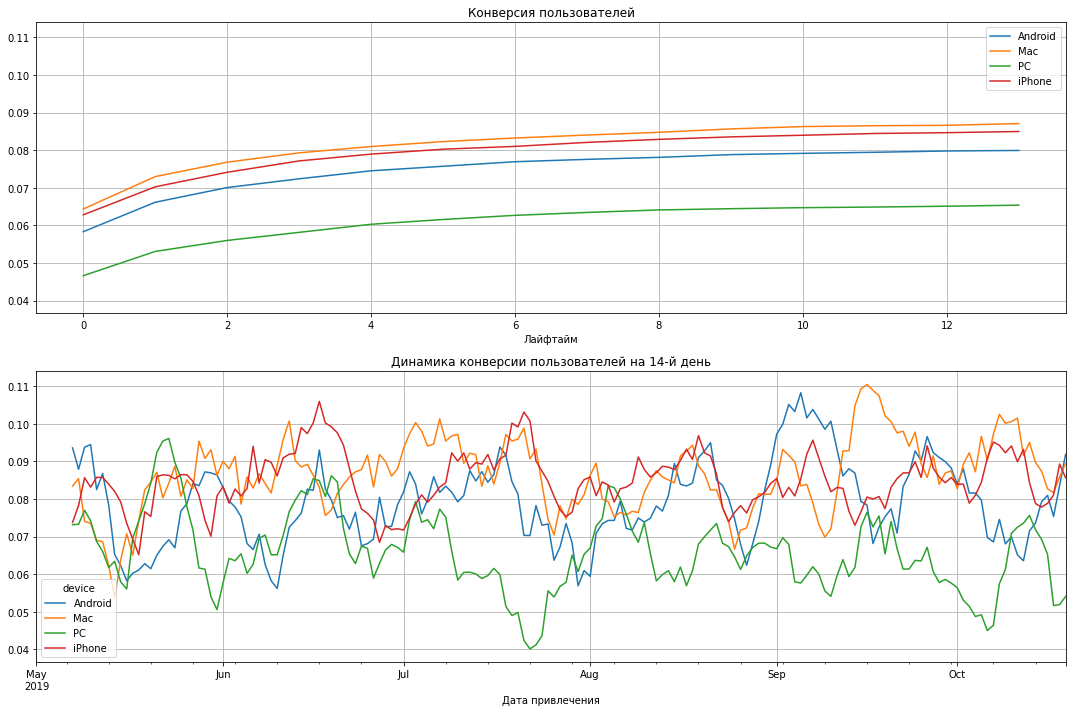

In [57]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Комментарий: По полученным графикам видно, что Mac и iPhone конвертируются лучше остальных устройств, PC отстает. Однако в динамике Mac не всегда занимает место лидера. Также по графику динамики можно сказать, что ниодно устройство не показало стабильности. По всем устройствам есть резкие подъемы и резкие спады.    

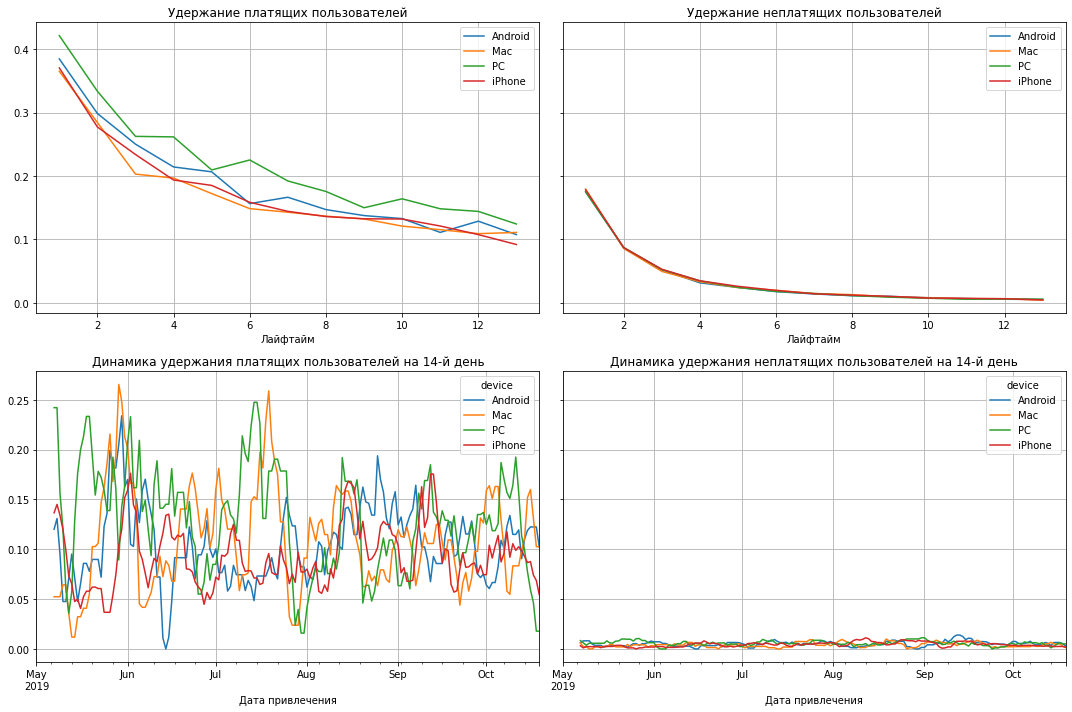

In [58]:
# смотрим удержиние с разбивкой по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Комментарий:  По полученным графикам видно, что по удержанию PC показал чуть более лучшие результаты, чем остальные уствройства. Если рассмотреть лайфтайм детально, то на первых днях идет последовательность Android-iPnone-Mac, а к последним дням лайфтайма Mac выходит на второе место по удержанию, далее Android и iPnone. Также по графику динамики можно сказать, что ниодно устройство не показало стабильности. По всем устройствам есть резкие подъемы и резкие спады. Удержание неплатящих пользователей стабильно низкое.    

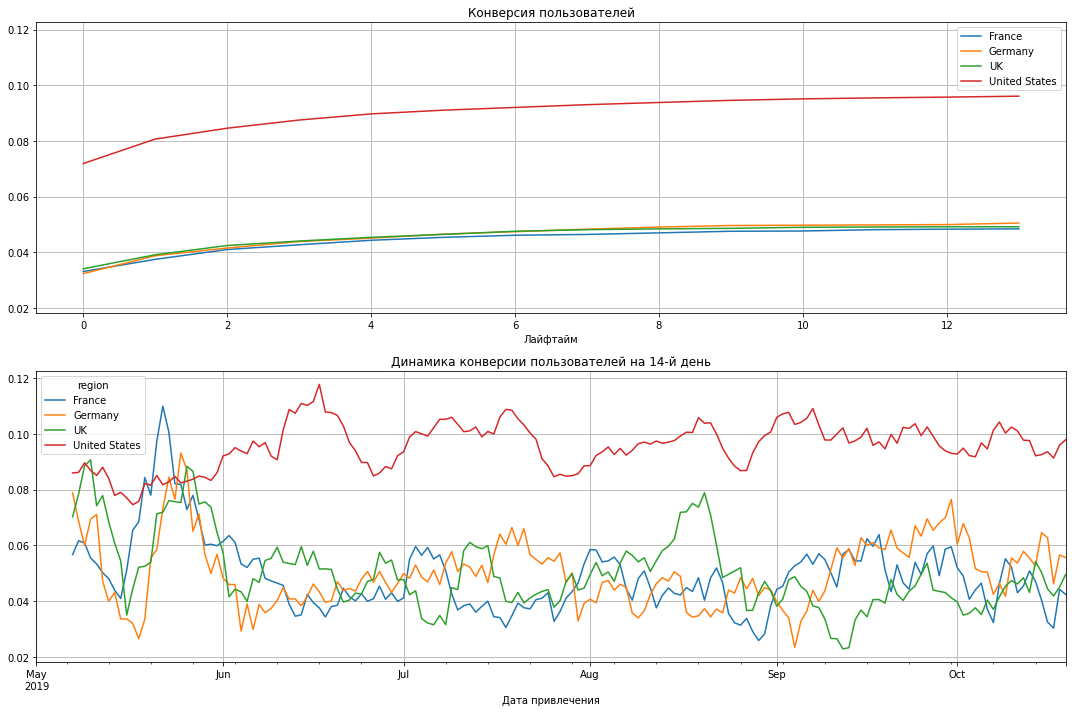

In [59]:
# смотрим конверсию с разбивкой по региону

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Комментарий: По полученным графикам видно, что больше всего конверсия жителей США. Также конверсия всех пользователей всех стран растет. В динамике у жителй США также наиболее стабильное количество по периодам. У остальных жителей остальных стран в двухнедельном периоде с мая - июль лучше чем в аналогичный период в октябре. 

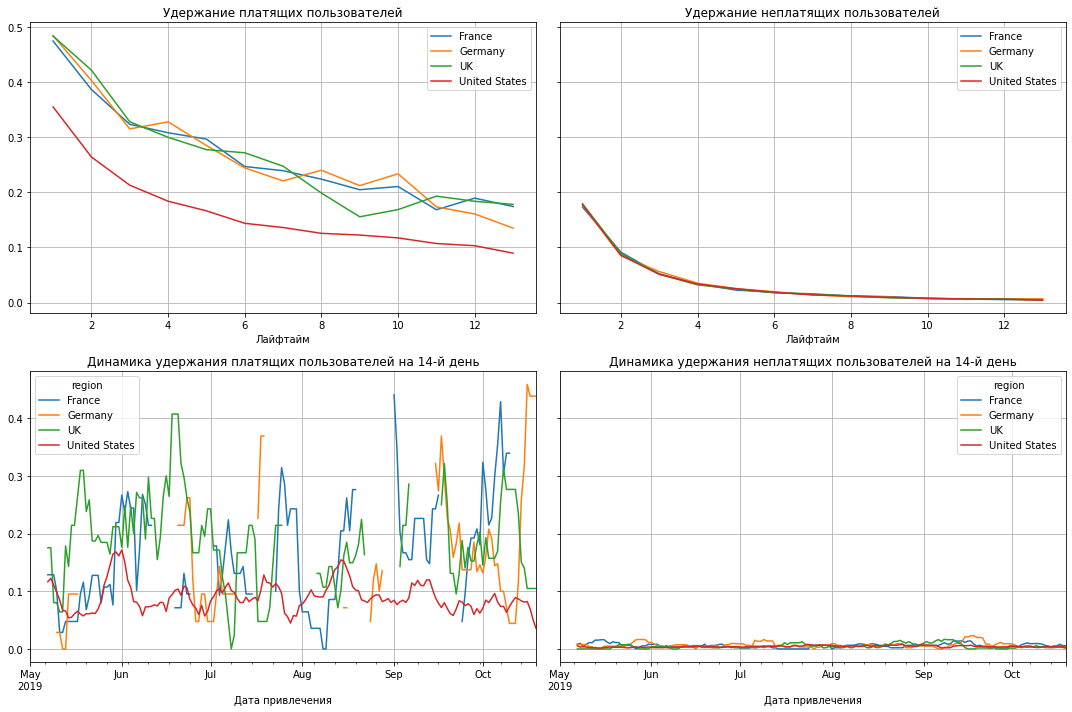

In [60]:
# смотрим удержиние с разбивкой по устройствам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Комментарий: По полученным графикам видно, что удержание всех пользователей снижается к концу периода. Несмотря на большую конверсию пользователей из США, удержание платящих пользователей у них значительно мало, по сравнению с другими странами. При этом самими преданными пользователями являются пользователи из Великобритании. В динамике удержания стабильность у пользователейц США. Удержание неплатящих пользователей стабильно низкое.

<a id='Selection5.3'></a>

### Анализ окупаемость рекламы с разбивкой по устройствам

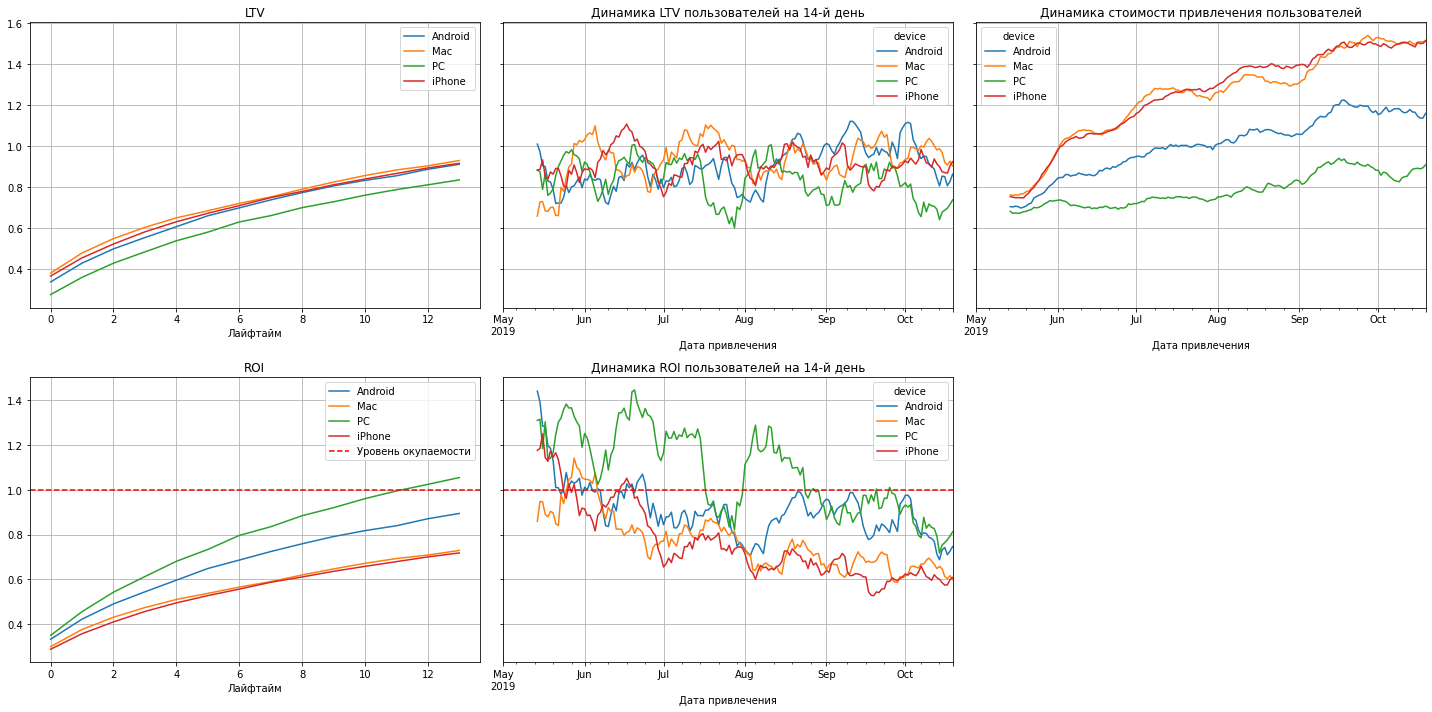

In [61]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Комментарий: По получившимся графикам можно сделать следующие выводы:

- что пользователи разных устройств приносят больше доходов к концу 2- недельного периода, чем вначале

- что динамика LTV достаточна стабильна между всеми когортами

- что динамика стоимости привлечения пользователей  растет, в большей степени по пользователям iPnone и Mac

- что лучше окупаются пользователи PC, однако с  августа окупаемость падает и окускается ниже уровня.

- что окупаемость инвестиций в динамике от когорты к когорте примерно одинаковая для всех устройств  и во времененом промежутке снижается. Следовательно проблема скорее всего не связана с определенным типом устройства.

<a id='Selection5.4'></a>

### Анализ окупаемость рекламы с разбивкой по странам


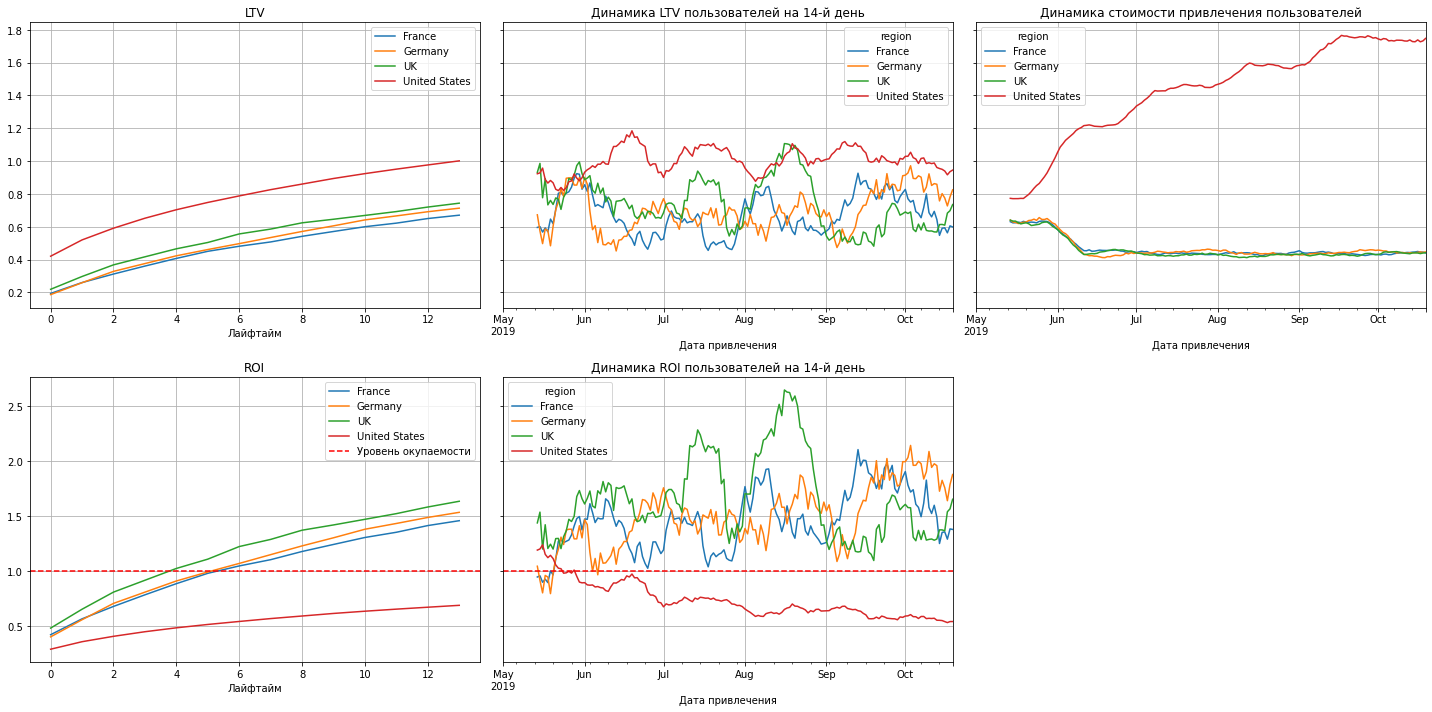

In [62]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Комментарий: По получившимся графикам можно сделать следующие выводы:

- что доходы от пользователей разных стран  стабильно увеличиваются. Но больше всего приносят пользователи из США

- что динамика LTV достаточна стабильна между всеми когортами, несколько выделяется динамика пользователей из США

- что динамика стоимости привлечения пользователей  растет только по пользователям США, а динамика стоимости привлечения пользователей из других стран резко падает в период с июня по июль и далее держится стабильно

- что пользователи всех стран окупают стабильно вложенные инвестиции, кроме пользователей из США 

- что окупаемость инвестиций в динамике от когорты к когорте имеет резкие спады и падения, но выше уровня окупаемости

<a id='Selection5.5'></a>

### Анализ окупаемость рекламы с разбивкой по каналам

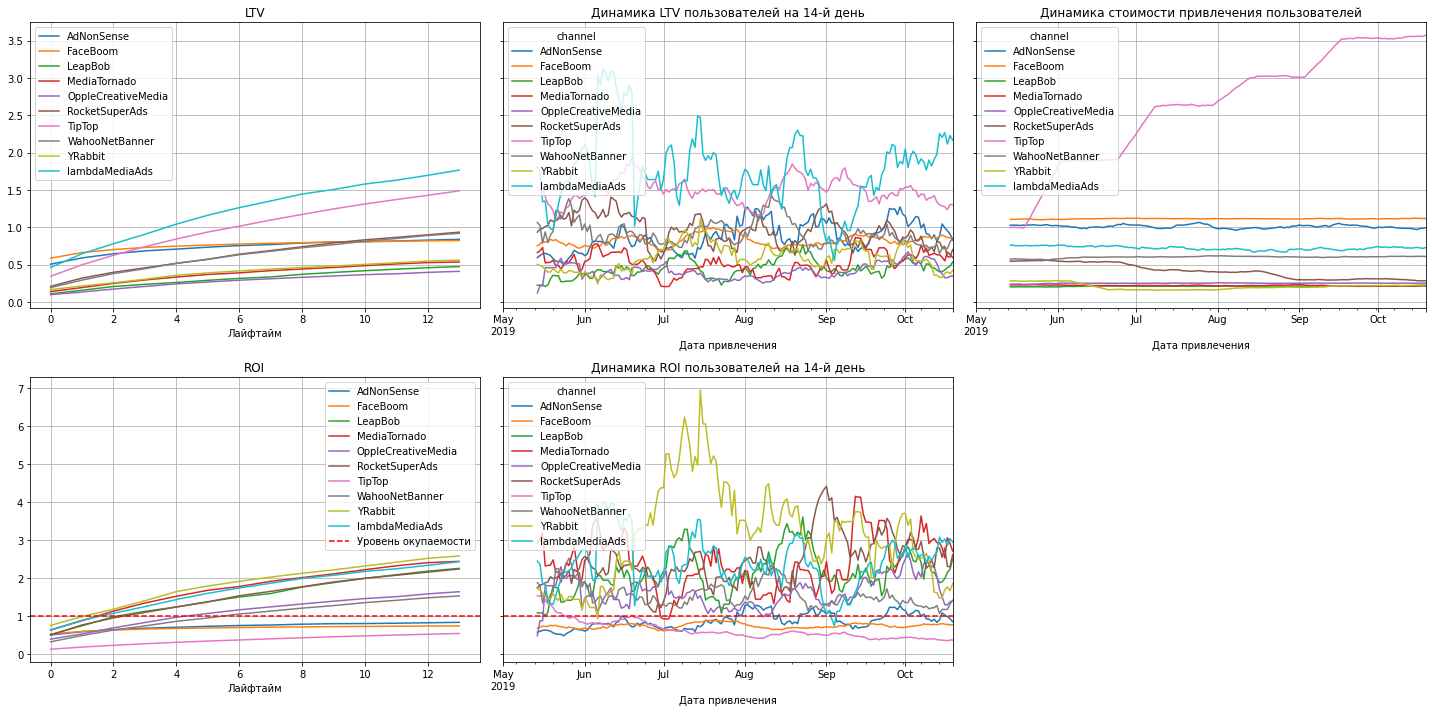

In [63]:
# смотрим окупаемость с разбивкой по каналм

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Комментарий: По получившимся графикам можно сделать следующие выводы:

- что доходы от пользователей c разных каналов стабильно увеличиваются, кроме каналов FaceBoom и AdNonSence. Больше всего доходов приносят пользователи из канала lamdaMediaAds

- что динамика LTV достаточна стабильна между всеми когортами, значительно выделяется динамика канала lamdaMediaAds

- что динамика стоимости привлечения пользователей растет только пользователей из TipTop, а динамика стоимости привлечения пользователей из других каналов держится стабильно или снижается

- что стабильно оккупаются 7 каналов и только 3 находятся ниже уровня окупаемости (TipTop, FaceBoom и AdNonSence)

- что окупаемость инвестиций в динамике от когорты к когорте имеет резкие спады и падения, но выше уровня окупаемости у 7 каналов

Так как окупаемость рекламы с разбивкой по странам показала, что конверсия пользователей из США самая большая, при этом удержание и оккупаемость инвестиций значительно низкая посмотрим окупаемость рекламы с разбивкой по рекламным каналам только пользователей из США 

In [64]:
# исключение из таблицы всех стран, кроме США
profiles_USA = profiles.query('region == "United States"')

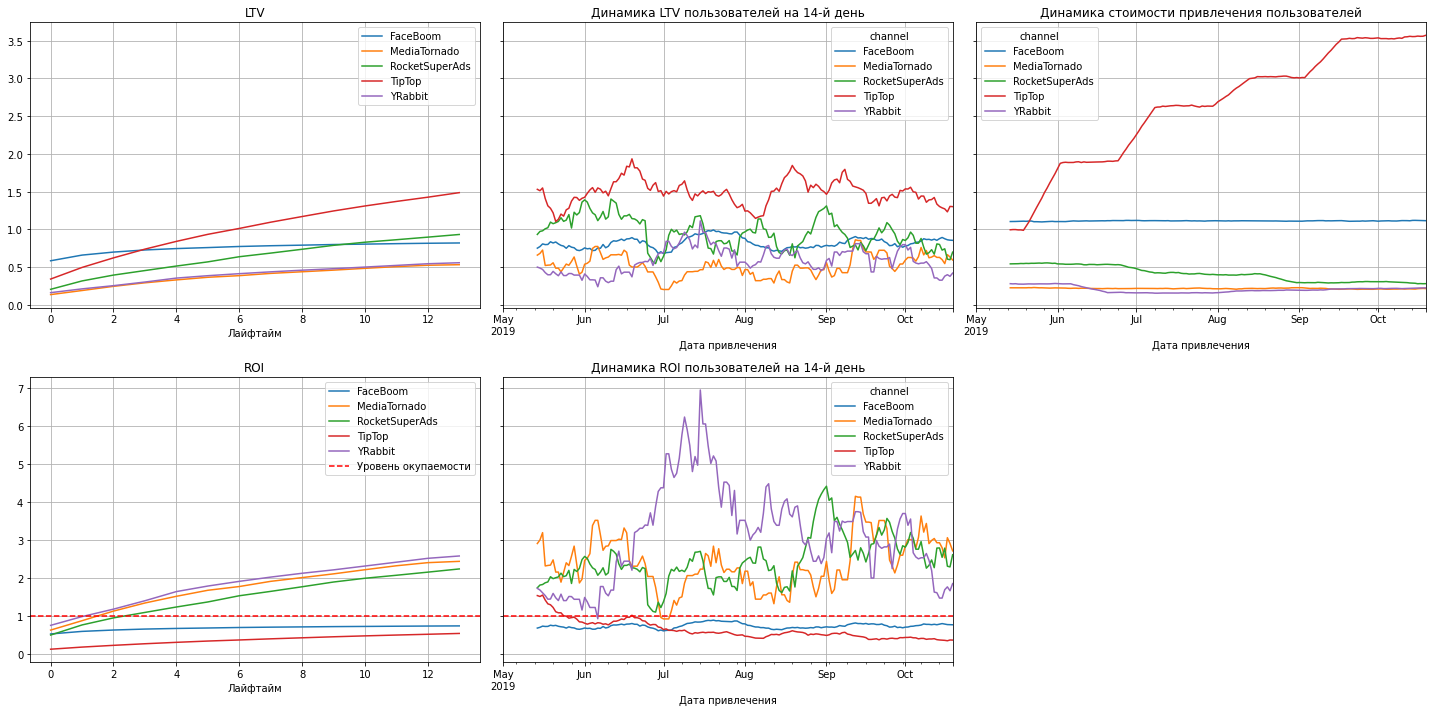

In [65]:
# смотрим окупаемость с разбивкой по источникам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Комментарий:  По получившимся графикам можно сделать следующие выводы:

- что пользователи из США приходят в приложение по каналам TipTop,FaceBoom, RocketSuperAds,MediaTornado, YRabbit

- что доходы от пользователей США через канал TipTop выше других,  в среднем LTV растет 

- что динамика LTV достаточна стабильна между всеми когортами,  выделяется динамика канала FaceBoom

- что динамика стоимости привлечения пользователей растет только пользователей из TipTop, а динамика стоимости привлечения пользователей из других каналов держится стабильно или снижается

- что реклама через каналы TipTop и FaceBoom не окупается 

- что окупаемость инвестиций в динамике от когорты к когорте имеет резкие спады и падения, но выше уровня окупаемости у каналов RocketSuperAds,MediaTornado, YRabbit(в большей степени), а TipTop и FaceBoom стабильно не окупается

**Вывод:**
В данном разделе исследования была проанализированна окупаемость рекламы с использованием графиков LTV, ROI и CAC. Перед исследованием органических пользователей исключили, чтобы результаты попучились корректными. Также посчитали конверсию  и удержание пользователей и динамику их изменения. Проанализировали окупаемость рекламы с разбивкой по устройствам, странам и рекламным каналам. В результате получили следующие выводы:

1) При анализе оккупаемости рекламы выяснили, что реклама не окупается. При этом доходы пользователей растут, также и в динамике. Значит, дело не в ухудшении качества пользователей. Заметили, что стоимость привлечения клиентов значительно увеличивается. Следовательно суммируя получившиеся результаты и анализирую результаты графиков, оккумаемость инвестиций стремительно снижается и переходит точку 0.

2) При подсчете конверсии и удержания пользователей и анализе показателей в динамике выяснили, что общая конверсия растёт, а общая динамика конверсии идет с резкими падениями и менее выраженными подъемами. А удержание платящих пользоватей стабильно снижается к концу периода. Все это означает, что большое количество пользователей приходят в приложение Procrastinate Pro+, но не долго проявляют интерес к нему. Чтобы разобраться в причинах убытков компании, просмотрели характеристики пользователей — по стране, источнику и устройству первого посещения.

3) При разбивке пользователей по каналам выяснили, что:
- в целом конверсия пользователей из всех рекламных каналов постепенно растёт на протяжении всех 14 дней. Выше всего конверсия у посетителей через канал FaceBoom.
- хуже всех удерживаются пользователи из FaceBoom, при этом опережая остальных по конверсии. Это значит, что через канал FaceBoom приходят в приложение большое количество пользователей, далее некоторые переходят в статус "платящих" и не задерживаются в приложении надолго. Также одним из худших по удержанию оказался рекламный источник AdNonSense. Однако в динамике удержания наиболее стабильны  каналы FaceBoom и TipTop. 

4) При разбивке пользователей по устройствам выяснили, что:
- пользователи Mac и iPhone конвертируются лучше остальных устройств, PC занимает последнее место. Однако в динамике Mac не всегда занимает место лидера. Также по графику динамики можно сказать, что ниодно устройство не показало стабильности. По всем устройствам есть резкие подъемы и резкие спады. 
- по удержанию PC показал чуть более лучшие результаты, чем остальные уствройства. Если рассмотреть лайфтайм детально, то на первых днях идет последовательность Android-iPnone-Mac, а к последним дням лайфтайма Mac выходит на второе место по удержанию, далее Android и iPnone. 

5) При разбивке пользователей по регионам выяснили, что:
- больше всего приложением пользуются жители США. Также конверсия всех пользователей всех стран растен. В динамике у жителй США также наиболее стабильное количество по периодам. 
- удержание всех пользователей снижается к концу периода. Несмотря на большую конверсию пользователей из США, удержание платящих пользователей у них значительно мало, по сравнению с другими странами. При этом самими преданными пользователями являются пользователи из Великобритании. В динамике удержания стабильность у пользователей из США

6) При анализе оккупаемости с разбивками по странам, устройствам и каналам выяснили, что:

- окупаемость рекламы со временем падает, а стоимость привлечения пользователей растет. В рассматриваемый период реклама в итоге не окупилась

- что пользователи всех стран окупают стабильно вложенные инвестиции, кроме пользователей из США. Возрастающие расходы на привлечение пользователей из США не оправдались
- провели дополнительную разбивку пользователей из США по каналам привлечения и выявили, что реклама не окупается только по каналам TipTop и FaceBoom, при этом стоимость привлечения пользователей из США через канал TipTop постоянно растет, а FaceBoom стабильно одинаковая

- что динамика стоимости привлечения пользователей растет, в большей степени по пользователям iPnone и Mac, а стабильно окупаются только владельцы PC

- чрезмерные расходы обнаружены на канал TipTop, который в результате не показал положительных результатов по ROI, как и каналы FaceBoom и AdNonSence 


## Итоговые выводы


Компания по разработке приложения Procrastinate Pro+ делает весомые вложения в рекламу, но последние несколько месяцев расходы превышают доходы. Главная задача исследования - найти причину произошедшего события и дать рекомендации для отдела маркетинга, чтобы работа компании вышла в положительный баланс. Мы ознакомились с данными о посещениях сайта, заказах и расходах на рекламу.
 
**Изучение данных.** Исходные данные требовали предобработки пред проведением дальнейшего анализа. Мы провели проверку на наличие явных и неявных дубликатов и наличие пропущенных значений. Дубликатов и пропусков в данных не было обнаружено. Исправлены названия столбцов в таблицах. Обраружены ошибки в наименовании столбцов и внесены изменния. Была произведена замена названия столбцов путем приведения к нижнему регистру.  Произвели замену типов данных в столбцах session_start, session_end и event_dt на тип данных соответствующий данным о дате и времени.

**Для проведения анализа мы задали следующие функции**:

get_profiles() — для создания профилей пользователей,

get_retention() — для подсчёта Retention Rate,

get_conversion() — для подсчёта конверсии,

get_ltv() — для подсчёта LTV.

А также функции для построения графиков:

filter_data() — для сглаживания данных,

plot_retention() — для построения графика Retention Rate,

plot_conversion() — для построения графика конверсии,

plot_ltv_roi — для визуализации LTV и ROI.

**В исследовалельском разделе** 
- Составили профили пользователей. Определите минимальную (1 мая 2019 г) и максимальную (27 октября 2019 г) даты привлечения пользователей. По условию задачи данные анализируются с 1 ноября 2019 года. Окупаемость должна наступить не позднее, чем через 2 недели после привлечения пользователей. Таким образом, момент анализа составляет 1 ноября 2019 г., горизонт анализа - 14 дней.
- Выяснили,что данное приложение используют жители 4 стран: США, Великобритания, Франция и Германия. США значительно лидируют по количеству пользователей.
- Выяснили, что позьзователи заходят в приложение с 4-х устройств: iPhone, Android, Mac и PC. iPhone является самым популярным устройством среди всех пользователей, далее Android, PC и Mac. 

- Изучили рекламные источники привлечения и определили, что количество рекламных источников привлечения - 10. Больше всего пользователей "organic", то есть тех, кто пришли без каких-либо рекламных источников. Самыми популярными рекламные источниками,которые в значительной степени опережают остальные источники - FaceBoom и TipTop.

**В маркетинговом разделе** посчитали общую сумму расходов на маркетинг, которая составила 105497 тыс.
Выяснили, что траты распределены по рекламным источникам следующим образом:

- TipTop 51.9%
- FaceBoom	30.8%
- WahooNetBanner	4.9%
- AdNonSense	3.7%
- OppleCreativeMedia		2.0%
- RocketSuperAds	1.7%
- LeapBob		1.7%
- lambdaMediaAds	1.5%
- MediaTornado 0.9%
- YRabbit	0.9%

По полученным результатам больше всего средств тратится на продвижение в TipTop - 57751 тыс, далее FaceBoom - 32445 тыс. Данные позиции в значительной степени отличаются от других рекламных источников по количеству расходов. Построили визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.График изменения расходов по времени показал, что траты на TipTop возрастали с каждым месяцем. Траты на FaceBoom росли гораздо медленнее. Все остальные источники существенно уступают по объему расходов на маркетинг и имеют более плавные переходы от одного месяца к другому. 

Посчитали, что в среднем привлечение одного пользователя (CAC) по всем каналам привлечения составило 0,7. А при разбивке по каналам:
- через канал TipTop получаются самые дорогие пользователи в среднем в 2.8
- из FaceBoom - 1.11 
- из AdNonSense - 1.01

**В разделе оценки окупаемости** проанализировали данные по пользователям приложения Procrastinate Pro+ из США, Великобритании, Франции и Германии. 

- США существенно опережают другие страны по количеству пользователей, в том числе платящих
- iPhonе лидирует среди устройств, занимая самую большую долю. 
- TipTop и FaceBoom являются наиболее расходными каналами. При этом на TipTop расходы на одного пользователя росли почти каждый месяц.
- При анализе оккупаемости рекламы выяснили, что реклама не окупается. При этом доходы пользователей растут, также и в динамике. Оккумаемость инвестиций стремительно снижается и переходит точку 0.
- При анализе расходов и окупаемости в разрезе по странам, устройствам и каналам выявлено, что причиной обнаруженных проблем являются чрезмерные расходы на привлечение пользователей из США, через канал TipTop, по устройствам одинаковая и снижается. Следовательно проблема не связана с определенным типом устройства.

- Провели дополнительную разбивку пользователей из США по каналам привлечения и выявили, что реклама не окупается только по каналам TipTop и FaceBoom, при этом стоимость привлечения пользователей из США через канал TipTop постоянно растет, а FaceBoom стабильно одинаковая

- Стоимость рекламы должна быть оптимальной. Например, в разрезе по устройствам расходы окупились по пользователям PC, в разрезе по странам - из Франции, Германии и Великобритании. ROI 7 каналов из 10 оказались выше уровня окупаемости.

Исходя из полученных результатов и причинно-следственых связей, рекламному отделу  приложения Procrastinate Pro+ рекомендуется сократить финансирование на рекламу в области, где стоимость привлечения неоправдано завышена:

- расходы на пользователей из США приходящих через канал TipTop и FaceBoom. А также стоит обратить внимание на канал привлечения RocketSuperAds, через который конверсия покупателей находится на третьем месте после 2-х вывеупомянутых каналов.

- расходы на продвижение через канал TipTop. 

- стоит обратить внимание на канал продвижения FaceBoom. Через данный канал в приложение переходят огромное количество пользователей, что подтверждается высоким уровнем конверсии. А затем интерес пропадает и удержание пользователей показывает самый низкий результат из всех 10 исследуемых каналов. При этом затраты на рекламу достаточно большие(2 место после TipTop) в сравнении с другими каналами. Есть вероятность, что пользователям  FaceBoom, которые скачивают приложение Procrastinate Pro+ оно не интересно - значит затраты на рекламу неоправданы, а есть вероятность, что реклама недостаточно информативна и не отражает всех достоинств приложения - значит пользователи не заинтересованы.  

- Тоже самое с каналом AdNonSence. Через данный канал в приложение переходят огромное количество пользователей, а удержание пользователей показывает низкий результат. Однако затраты на рекламу в разы меньше. Возмозно стоит пересмотреть рекламную кампанию и сделать ее более эффективной.